### Preprocesamiento de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

df = pd.read_csv('./train.csv')

df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

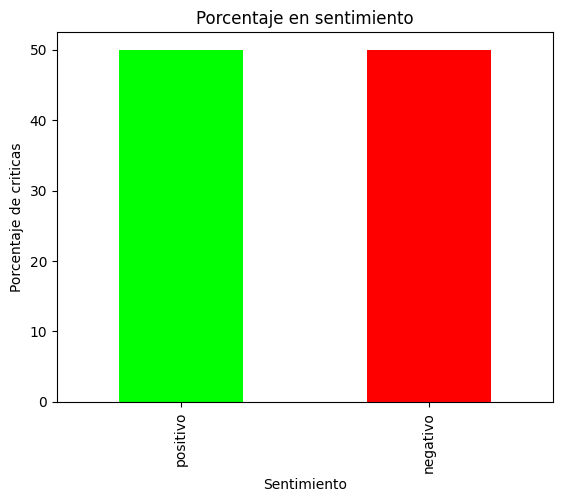

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

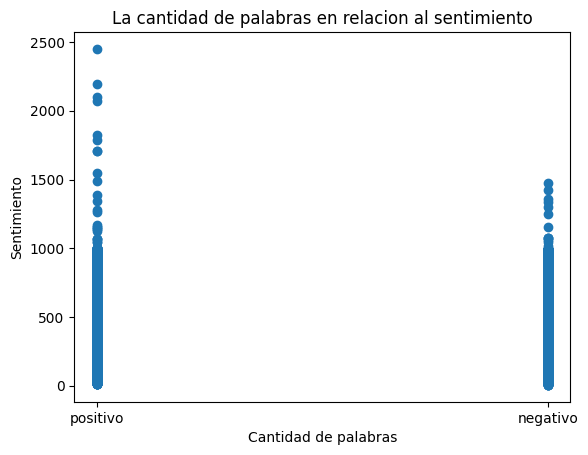

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

In [4]:
df.review_es

0        Uno de los otros críticos ha mencionado que de...
1        Una pequeña pequeña producción.La técnica de f...
2        Pensé que esta era una manera maravillosa de p...
3        Básicamente, hay una familia donde un niño peq...
4        El "amor en el tiempo" de Petter Mattei es una...
                               ...                        
49995    Pensé que esta película hizo un buen trabajo a...
49996    Mala parcela, mal diálogo, mala actuación, dir...
49997    Soy católica enseñada en escuelas primarias pa...
49998    Voy a tener que estar en desacuerdo con el com...
49999    Nadie espera que las películas de Star Trek se...
Name: review_es, Length: 50000, dtype: object

In [5]:
!pip install nltk

Nos quedamos únicamente  con las reviews en español

In [5]:
from langdetect import detect

indices = []

for i, fila in df.iterrows():
    review = fila['review_es']
    if detect(review) != 'es':
        indices.append(i)

df.iloc[indices]

,ID,review_es,sentimiento,num_palabras
156,156,From the film's first shot - Keira Knightley a...,negativo,832
249,249,'Airport 4' is basically a slopped together me...,negativo,115
250,250,"Supposedly a ""social commentary"" on racism and...",negativo,124
263,263,"There is a difference between a ""film,"" and a ...",negativo,906
264,264,please re-watch all 3 series and do not go see...,negativo,120
...,...,...,...,...
49772,49772,CitizenX(1995) is the developing world's answe...,positivo,961
49792,49792,"Thirty years after its initial release, the th...",positivo,861
49833,49833,THE SHOP AROUND THE CORNER is one of the sweet...,positivo,1138
49861,49861,"OK OK, it might be hard to put the entirety of...",negativo,954


In [6]:
df.drop(indices,inplace= True)

Hacemos el train test split con 30% test y 70% train

Ahora utilizamos nltk para hacer stemming de las reviews

In [7]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Inicializar stemmer en español
stemmer = SnowballStemmer('spanish')

# Función para aplicar el stemming a una oración
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Aplicar el stemming a la columna df.review_es y guardar en una nueva columna
df['stemmed_review'] = df['review_es'].apply(stem_sentence)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['stemmed_review'].head()

0    uno de los otros critic ha mencion que despues...
1    una pequeñ pequeñ produccion.l tecnic de filma...
2    pens que esta era una maner maravill de pas ti...
3    basic , hay una famili dond un niñ pequeñ ( ja...
4    el `` amor en el tiemp '' de pett mattei es un...
Name: stemmed_review, dtype: object

In [9]:
#Data Preprocessing 
X_train, X_test, y_train, y_test = train_test_split(df.stemmed_review, 
                                                    df.sentimiento,
                                                    test_size=0.30,
                                                    random_state=25,
                                                    shuffle=True)

In [10]:
X_train

9968     vi esta pelicul en su prim ministr en sundanc ...
28996    lo mejor de la sed , la ultim pelicul de chanw...
13772    sab la premis de esta pelicul , y obvi no pued...
20202    es tan depriment cuand los cineast intent ser ...
6289     buen : error de objet cuand charli sal de la h...
                               ...                        
37351    dificil de cre que el director barbet schroed ...
28305    hay una gran cantid de exager obvi asoci con e...
7337     el orig indec del lon rang . muestr quien era ...
26415    otra pelicul de cortador de gallet sobr un adu...
31408    despues de perd 2 hor de mi vid viend esta pel...
Name: stemmed_review, Length: 33726, dtype: object

### Entrenamos el modelo

Utilizamos TfidfVectorizer y CountVectorizer para tokenizar 

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# Armamos los modelos
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(CountVectorizer(), MultinomialNB())
# Entrenamos los modelos
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
# Hacemos un predict del test
predicted_categories = model.predict(X_test)
predicted_categories_2 = model2.predict(X_test)

In [12]:
print(predicted_categories)
print(predicted_categories_2)

['negativo' 'negativo' 'negativo' ... 'positivo' 'positivo' 'positivo']
['negativo' 'negativo' 'negativo' ... 'positivo' 'positivo' 'positivo']


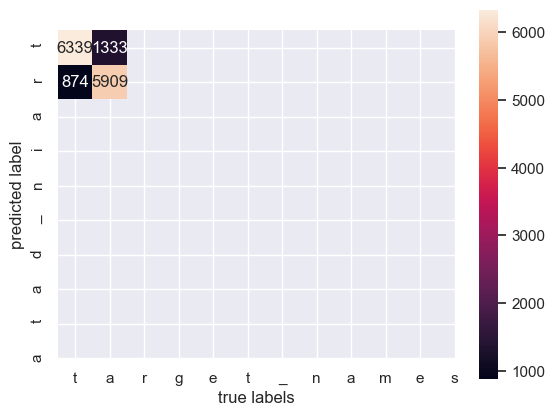

The accuracy using TfidfVectorizer  is 0.8473192666897268
The precision is TfidfVectorizer 0.8473192666897268
The accuracy count is  0.8433068142511242
The precision count is 0.8433068142511242


In [13]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
sns.set() # use seaborn plotting style

# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels="target_names",yticklabels="train_data")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("The accuracy using TfidfVectorizer  is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is TfidfVectorizer {}".format(precision_score(y_test, predicted_categories, average='micro',)))
print("The accuracy count is  {}".format(accuracy_score(y_test, predicted_categories_2)))
print("The precision count is {}".format(precision_score(y_test, predicted_categories_2, average='micro',)))


Metricas con TfidVectorizer

F1 Score: 0.8426381461675579
Accuracy Score: 0.8473192666897268
Recall Score: 0.815934824634079
Precision Score: 0.8711484593837535
              precision    recall  f1-score   support

    negativo       0.83      0.88      0.85      7213
    positivo       0.87      0.82      0.84      7242

    accuracy                           0.85     14455
   macro avg       0.85      0.85      0.85     14455
weighted avg       0.85      0.85      0.85     14455



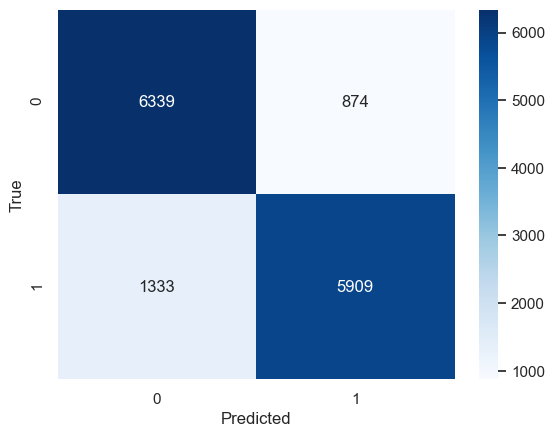

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer, f1_score

print(f"F1 Score: {f1_score(y_test,predicted_categories, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,predicted_categories)}")
print(f"Recall Score: {recall_score(y_test,predicted_categories, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,predicted_categories, pos_label='positivo')}")

cm = confusion_matrix(y_test,predicted_categories)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,predicted_categories))

Metricas CountVectorizer

F1 Score: 0.8400988351570774
Accuracy Score: 0.8433068142511242
Recall Score: 0.8215962441314554
Precision Score: 0.8594539939332659
              precision    recall  f1-score   support

    negativo       0.83      0.87      0.85      7213
    positivo       0.86      0.82      0.84      7242

    accuracy                           0.84     14455
   macro avg       0.84      0.84      0.84     14455
weighted avg       0.84      0.84      0.84     14455



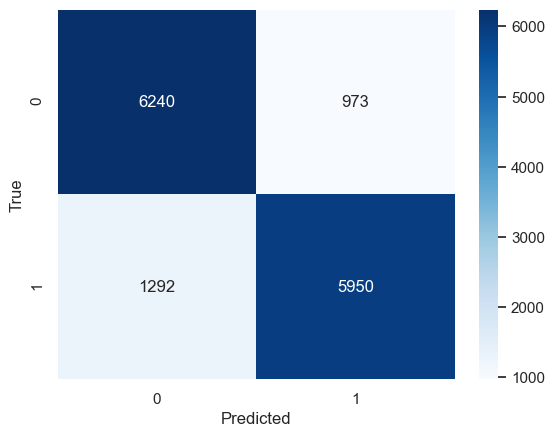

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer, f1_score

print(f"F1 Score: {f1_score(y_test,predicted_categories_2, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,predicted_categories_2)}")
print(f"Recall Score: {recall_score(y_test,predicted_categories_2, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,predicted_categories_2, pos_label='positivo')}")

cm = confusion_matrix(y_test,predicted_categories_2)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,predicted_categories_2))

Como TfidfVectorizer  nos dio mejores resultados, usaremos el modelo que lo usa para hacer el predict de kaggle

### Predict de Kaggle

In [16]:
df_kaggle = pd.read_csv('./test.csv')
df_kaggle['stemmed_review'] = df_kaggle['review_es'].apply(stem_sentence)
y_pred_kaggle_cv = model.predict(df_kaggle.stemmed_review)
ds_kaggle = pd.DataFrame({'ID': df_kaggle['ID'], 'sentimiento': y_pred_kaggle_cv.ravel()})

print(ds_kaggle.shape)
ds_kaggle.to_csv('pred_kaggle_Bayes_Naive_5.csv', index=False)

(8599, 2)


### Guardamos el modelo

In [17]:
# Guardar el arbol
import joblib
filename = 'BayesNaive_v4.sav'
joblib.dump(model, filename)

['BayesNaive_v4.sav']